## imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

## over-sampled data

In [2]:
# read data

df_o = pd.read_csv('over-sample.csv')

In [3]:
# choose train and test variable

X = df_o.drop('Outcome', axis=1)
y = df_o['Outcome']

In [4]:
# scale data

scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)
X = Xstd

#train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=101)

In [5]:
# accuracy of over-sampled data with 25% test size

from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
pred= model.predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, pred)

0.7545454545454545

### RBF SVM

In [6]:
# basic model (to put best params in after grid search)

from sklearn.svm import SVC
svm_rbf = SVC(kernel="rbf",C=0.5,gamma="scale")
svm_rbf.fit(X_train,y_train)
print("Accuracy of svm(rbf): %",svm_rbf.score(X_test,y_test)*100)
print(svm_rbf.get_params())

Accuracy of svm(rbf): % 75.9090909090909
{'C': 0.5, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


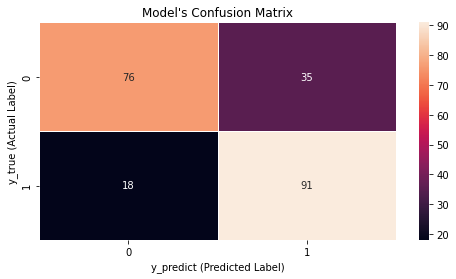

True negative =  76
False positive =  35
False negative =  18
True positive =  91
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       111
           1       0.72      0.83      0.77       109

    accuracy                           0.76       220
   macro avg       0.77      0.76      0.76       220
weighted avg       0.77      0.76      0.76       220



In [7]:
# RBF svm performance analysis (before grid search)

#confusion matrix 
y_pred = svm_rbf.predict(X_test)
y_true = y_test

# 0 value is negative
# 1 value is positive
cmatrix_rbf = confusion_matrix(y_true,y_pred,labels=[0,1])

f,ax = plt.subplots(figsize=(8,4))
sns.heatmap(cmatrix_rbf,annot=True,linewidths=0.5,cbar=True,linecolor="white",fmt='.0f',ax=ax)
plt.title("Model's Confusion Matrix")
plt.xlabel("y_predict (Predicted Label)")
plt.ylabel("y_true (Actual Label)")
plt.show()

print('True negative = ', cmatrix_rbf[0][0])
print('False positive = ', cmatrix_rbf[0][1])
print('False negative = ', cmatrix_rbf[1][0])
print('True positive = ', cmatrix_rbf[1][1])

from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

#### grid search

In [8]:
# grid search 

param_grid = { 
   'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6)
}
svm_rbf = SVC(kernel="rbf")
svm_gscv = GridSearchCV(svm_rbf,param_grid) #cv default = 5
svm_gscv.fit(X_train,y_train)

print("Tuned best parameters for kernel rbf svm: ",svm_gscv.best_params_ ) 
print("Best score: {}".format(svm_gscv.best_score_))

Tuned best parameters for kernel rbf svm:  {'C': 1.0, 'gamma': 100.0}
Best score: 0.8768910478834144


In [9]:
# basic model (with best params)

svm_rbf = SVC(kernel="rbf",C=1,gamma=100)
svm_rbf.fit(X_train,y_train)
print("Accuracy of svm(rbf): %",svm_rbf.score(X_test,y_test)*100)
print(svm_rbf.get_params())

Accuracy of svm(rbf): % 90.0
{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 100, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


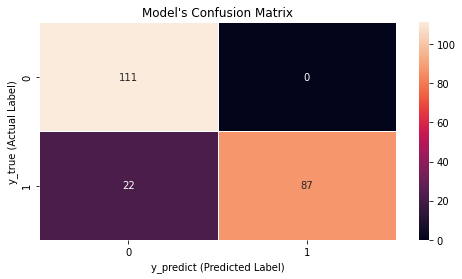

True negative =  111
False positive =  0
False negative =  22
True positive =  87
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       111
           1       1.00      0.80      0.89       109

    accuracy                           0.90       220
   macro avg       0.92      0.90      0.90       220
weighted avg       0.92      0.90      0.90       220



In [10]:
# RBF svm performance analysis (after grid search)

#confusion matrix 
y_pred = svm_rbf.predict(X_test)
y_true = y_test

# 0 value is negative
# 1 value is positive
cmatrix_rbf = confusion_matrix(y_true,y_pred,labels=[0,1])

f,ax = plt.subplots(figsize=(8,4))
sns.heatmap(cmatrix_rbf,annot=True,linewidths=0.5,cbar=True,linecolor="white",fmt='.0f',ax=ax)
plt.title("Model's Confusion Matrix")
plt.xlabel("y_predict (Predicted Label)")
plt.ylabel("y_true (Actual Label)")
plt.show()

print('True negative = ', cmatrix_rbf[0][0])
print('False positive = ', cmatrix_rbf[0][1])
print('False negative = ', cmatrix_rbf[1][0])
print('True positive = ', cmatrix_rbf[1][1])

from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

#### cross validation

In [11]:
# cross validation

rbf_svc = SVC(kernel='rbf',C=1,gamma=100)
rbf_svc.fit(X,y)
rbf_svc_result = cross_validate(rbf_svc,X, y, cv=5,scoring='accuracy',return_train_score=True)
print("Cv:5, Test Score: {}".format(rbf_svc_result['test_score']))
print("Cv:5, Train Score: {}".format(rbf_svc_result['train_score']))

accuracy = cross_val_score(rbf_svc,X,y,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(),accuracy.std() * 2))

f1 = cross_val_score(rbf_svc,X,y,cv=5,scoring='f1')
print('F1 Score : ',f1)
# mse = cross_val_score(rbf_svc,X,y,cv=5,scoring='neg_mean_squared_error')
# print('Negative Mean Squared Error: ', mse)

# from sklearn.metrics import jaccard_score
# js = jaccard_score(y_test[0], y_pred[0])
#print('Jaccard Score: ',js)

print("Cv = 5, recall = ",cross_val_score(rbf_svc, X, y, scoring='recall'))
print("Cv = 5, precision = ",cross_val_score(rbf_svc, X, y, scoring='precision'))

Cv:5, Test Score: [0.90340909 0.93181818 0.9375     0.96       0.93714286]
Cv:5, Train Score: [1. 1. 1. 1. 1.]
Accuracy: 0.93 (+/- 0.04)
F1 Score :  [0.89440994 0.92682927 0.93333333 0.95808383 0.93333333]
Cv = 5, recall =  [0.81818182 0.86363636 0.875      0.91954023 0.875     ]
Cv = 5, precision =  [0.98630137 1.         1.         1.         1.        ]


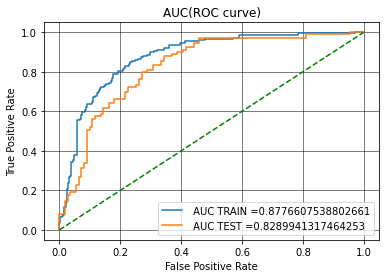

In [12]:
# roc curve of train and test accuracy

from sklearn import svm
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

np.random.seed(0)

random_state = np.random.RandomState(0)
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True,
                                 random_state=random_state))
classifier.fit(X_train, y_train)

y_train_pred = classifier.decision_function(X_train)    
y_test_pred = classifier.decision_function(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()
#when AUC is 0.5-1, high chance that classifier is able to distinguish positive class valuces from negative class (detect more true positive and true negative)

#### plotting of graphs

<AxesSubplot:xlabel='BMI', ylabel='Times Pregnant'>

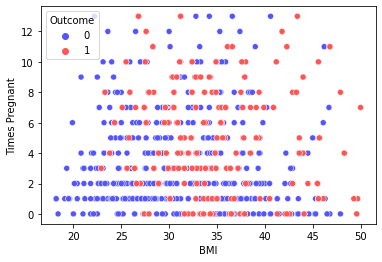

In [13]:
# times pregnant and bmi correlation 0.037 (3D)

sns.scatterplot(x='BMI',y='Times Pregnant',hue='Outcome',
                data=df_o,palette='seismic')

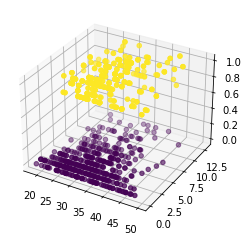

In [14]:
# times pregnant and bmi correlation 0.037 (3D)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_o['BMI'], df_o['Times Pregnant'], df_o['Outcome'], c=df_o['Outcome'])

<AxesSubplot:xlabel='Age', ylabel='Times Pregnant'>

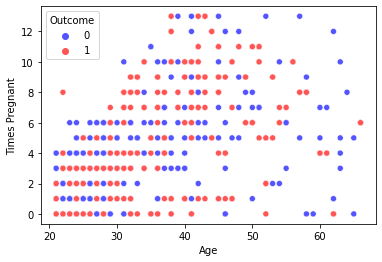

In [15]:
# times pregnant and age correlation 0.57 

sns.scatterplot(x='Age',y='Times Pregnant',hue='Outcome',
                data=df_o,palette='seismic')

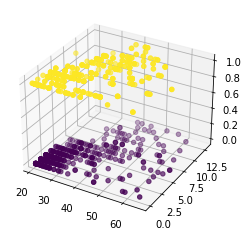

In [16]:
# times pregnant and age correlation 0.57 (3D)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_o['Age'], df_o['Times Pregnant'], df_o['Outcome'], c=df_o['Outcome'])

<AxesSubplot:xlabel='BMI', ylabel='Plasma Glucose Concentration'>

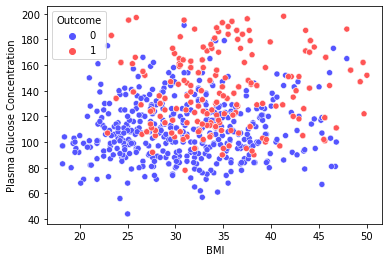

In [17]:
# plasma glucose and bmi correlation 0.19  

sns.scatterplot(x='BMI',y='Plasma Glucose Concentration',hue='Outcome',
                data=df_o,palette='seismic')

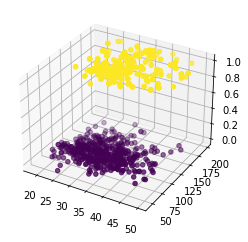

In [18]:
# plasma glucose and bmi correlation 0.19   

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_o['BMI'], df_o['Plasma Glucose Concentration'], df_o['Outcome'], c=df_o['Outcome'])

<AxesSubplot:xlabel='Age', ylabel='Plasma Glucose Concentration'>

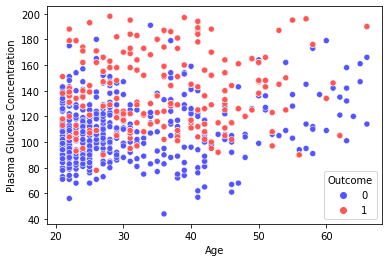

In [19]:
# plasma glucose and bmi correlation 0.29  

sns.scatterplot(x='Age',y='Plasma Glucose Concentration',hue='Outcome',
                data=df_o,palette='seismic')

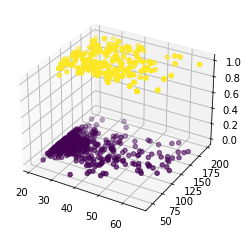

In [20]:
# plasma glucose and bmi correlation 0.29 (3D)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_o['Age'], df_o['Plasma Glucose Concentration'], df_o['Outcome'], c=df_o['Outcome'])

In [21]:
import pickle
svm_model = pickle.dump(svm_rbf, open('svmf.h5', 'wb'))